In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [3]:
df = pd.read_csv('yacht_hydrodynamics.csv')

df.head()


,LCB,CP,LDR,BTR,LBR,FR,RR
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [4]:
print(df.isnull().sum())

LCB    0
CP     0
LDR    0
BTR    0
LBR    0
FR     0
RR     0
dtype: int64


In [5]:

X = df.drop(columns=['RR']) 
y = df['RR']  

# Normalizing Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R² Score: 0.5450299966509139
Linear Regression RMSE: 8.222082168071124


In [7]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree R² Score: 0.9952267317639748
Decision Tree RMSE: 0.8421672540996684


In [8]:
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("Bagging R² Score:", r2_score(y_test, y_pred_bag))
print("Bagging RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_bag)))


Bagging R² Score: 0.9978281720080379
Bagging RMSE: 0.5680716861850797


In [9]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting R² Score:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

# AdaBoost
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

print("AdaBoost R² Score:", r2_score(y_test, y_pred_ada))
print("AdaBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ada)))


Gradient Boosting R² Score: 0.9975742518757255
Gradient Boosting RMSE: 0.6003621202358903
AdaBoost R² Score: 0.9923207317250468
AdaBoost RMSE: 1.068194532016785


In [10]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN R² Score:", r2_score(y_test, y_pred_knn))
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))


KNN R² Score: 0.4595387137126832
KNN RMSE: 8.961335269168965


In [11]:
svm = SVR(kernel='rbf', C=100, gamma=0.1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM R² Score:", r2_score(y_test, y_pred_svm))
print("SVM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svm)))


SVM R² Score: 0.9237307487756121
SVM RMSE: 3.3663957660814168


In [12]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest Performance
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R² Score: 0.9980164758661785
Random Forest RMSE: 0.542886666126608


In [13]:
# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Grid Search CV
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Train with best parameters
best_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate Best Random Forest
print("Optimized Random Forest R² Score:", r2_score(y_test, y_pred_best_rf))
print("Optimized Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest R² Score: 0.9980164758661785
Optimized Random Forest RMSE: 0.542886666126608


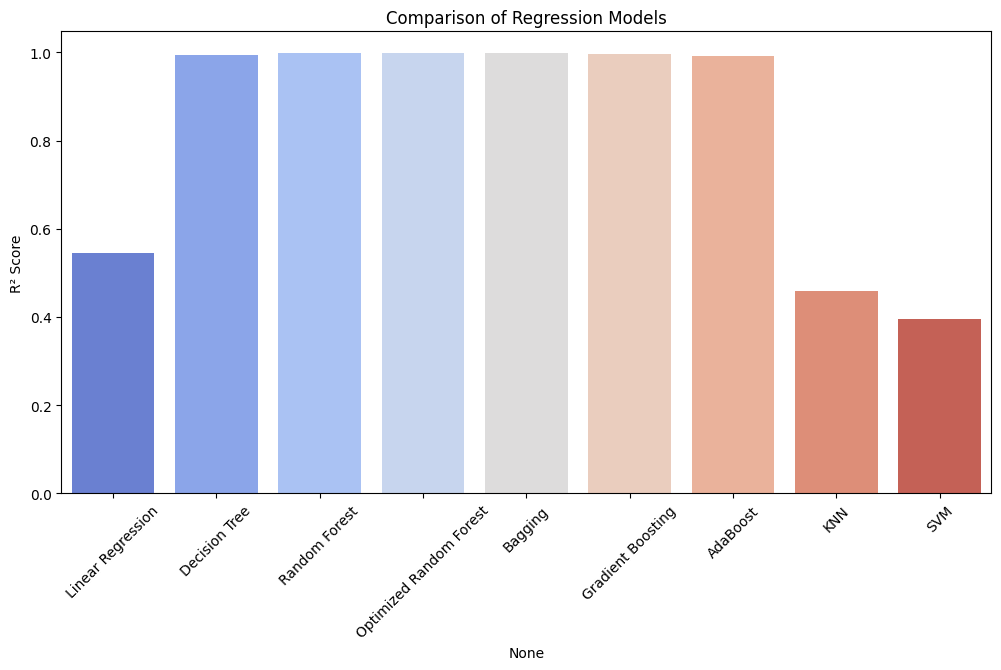

In [14]:
models = {
    "Linear Regression": r2_score(y_test, LinearRegression().fit(X_train, y_train).predict(X_test)),
    "Decision Tree": r2_score(y_test, DecisionTreeRegressor().fit(X_train, y_train).predict(X_test)),
    "Random Forest": r2_score(y_test, y_pred_rf),
    "Optimized Random Forest": r2_score(y_test, y_pred_best_rf),
    "Bagging": r2_score(y_test, BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42).fit(X_train, y_train).predict(X_test)),
    "Gradient Boosting": r2_score(y_test, GradientBoostingRegressor().fit(X_train, y_train).predict(X_test)),
    "AdaBoost": r2_score(y_test, AdaBoostRegressor().fit(X_train, y_train).predict(X_test)),
    "KNN": r2_score(y_test, KNeighborsRegressor().fit(X_train, y_train).predict(X_test)),
    "SVM": r2_score(y_test, SVR().fit(X_train, y_train).predict(X_test)),
}

# Convert to DataFrame
model_performance = pd.DataFrame(models.values(), index=models.keys(), columns=["R² Score"])

# Plot Performance
plt.figure(figsize=(12, 6))
sns.barplot(x=model_performance.index, y=model_performance["R² Score"], hue=model_performance.index, palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.title("Comparison of Regression Models")
plt.ylabel("R² Score")
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_25552\2350875881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'], palette="viridis")


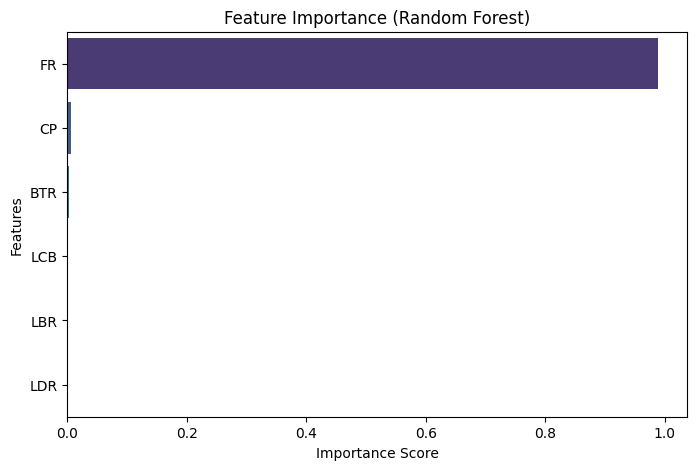

In [15]:
# Get feature importance from Random Forest
feature_importance = best_rf.feature_importances_

# Convert to DataFrame
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


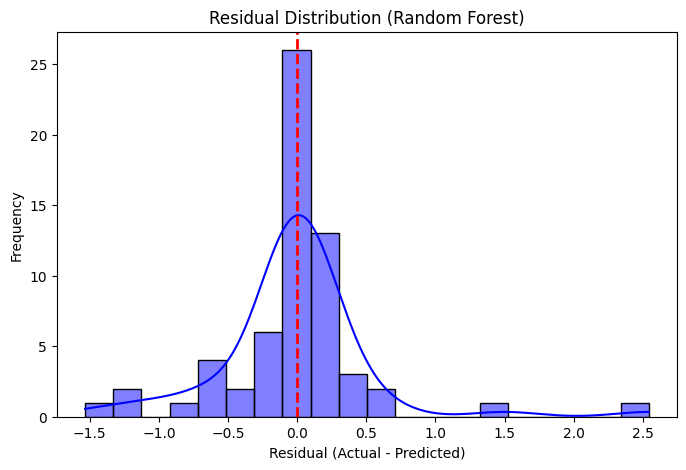

In [16]:
# Compute residuals for Random Forest
residuals = y_test - y_pred_best_rf

# Plot Residual Distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='dashed', linewidth=2)  # Reference line at 0
plt.title("Residual Distribution (Random Forest)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


In [17]:
import xgboost as xgb

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate XGBoost Performance
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


XGBoost R² Score: 0.999038066945459
XGBoost RMSE: 0.3780618496886908


C:\Users\DELL\AppData\Local\Temp\ipykernel_25552\1002440572.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_df_xgb['Importance'], y=feature_df_xgb['Feature'], palette="magma")


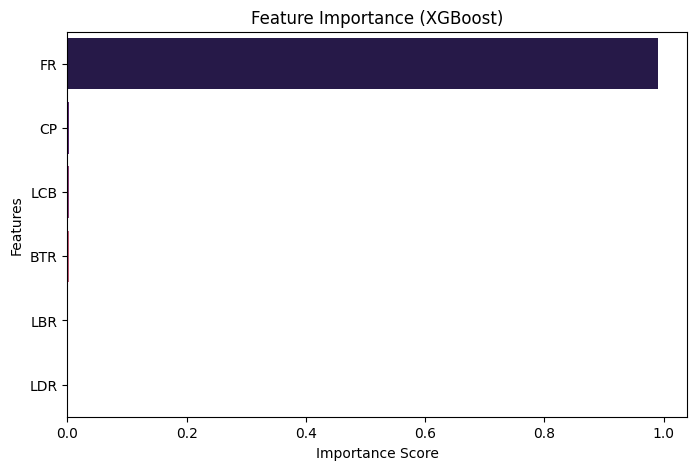

In [18]:
# Get feature importance
feature_importance_xgb = xgb_reg.feature_importances_

# Convert to DataFrame
feature_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_xgb})
feature_df_xgb = feature_df_xgb.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_df_xgb['Importance'], y=feature_df_xgb['Feature'], palette="magma")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


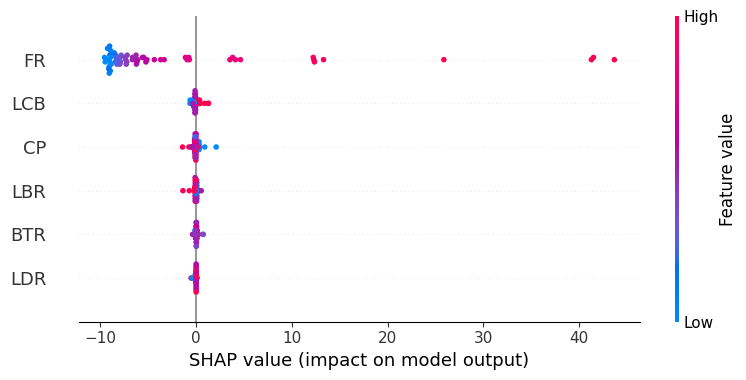

In [19]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_reg, X_train)
shap_values = explainer(X_test)

# Summary Plot (Overall Feature Impact)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [20]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# Train the best model
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the optimized model
print("Optimized XGBoost R² Score:", r2_score(y_test, y_pred_best_xgb))
print("Optimized XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_xgb)))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best R² Score: 0.9976490193159826
Optimized XGBoost R² Score: 0.9991082040066138
Optimized XGBoost RMSE: 0.36401827640967704


C:\Users\DELL\AppData\Local\Temp\ipykernel_25552\232029030.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_df_xgb['Importance'], y=feature_df_xgb['Feature'], palette="coolwarm")


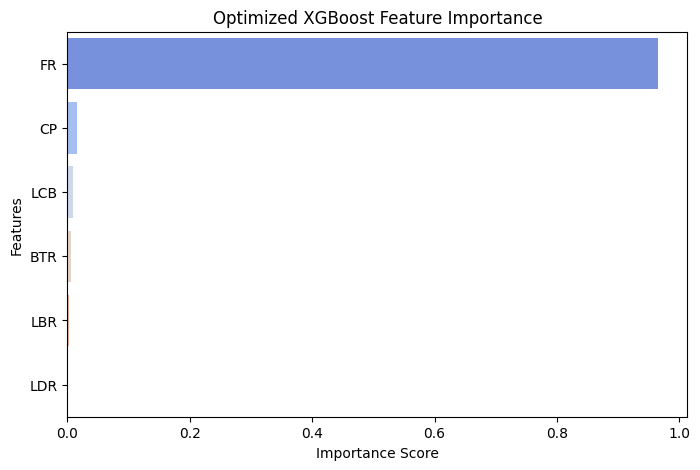

In [21]:
# Get feature importance
feature_importance_xgb = best_xgb.feature_importances_

# Convert to DataFrame
feature_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_xgb})
feature_df_xgb = feature_df_xgb.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_df_xgb['Importance'], y=feature_df_xgb['Feature'], palette="coolwarm")
plt.title("Optimized XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [22]:
# Train and evaluate other models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Optimized XGBoost": best_xgb
}

performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    performance[name] = {
        "R² Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Convert performance dictionary to DataFrame
performance_df = pd.DataFrame(performance).T
performance_df


,R² Score,RMSE
Linear Regression,0.545030,8.222082
Decision Tree,0.995227,0.842167
Random Forest,0.998016,0.542887
Gradient Boosting,0.997574,0.600362
Optimized XGBoost,0.999108,0.364018


C:\Users\DELL\AppData\Local\Temp\ipykernel_25552\3265729599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df["R² Score"], palette="coolwarm")


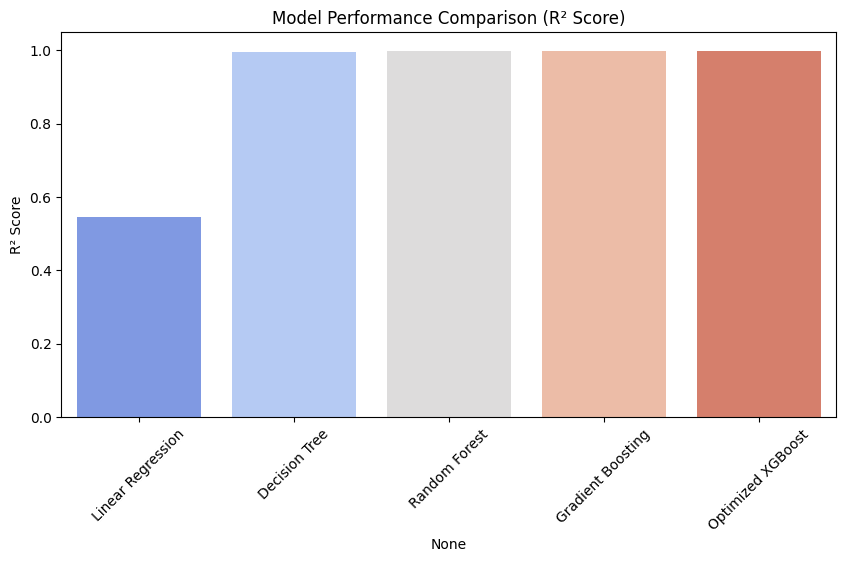

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=performance_df.index, y=performance_df["R² Score"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()


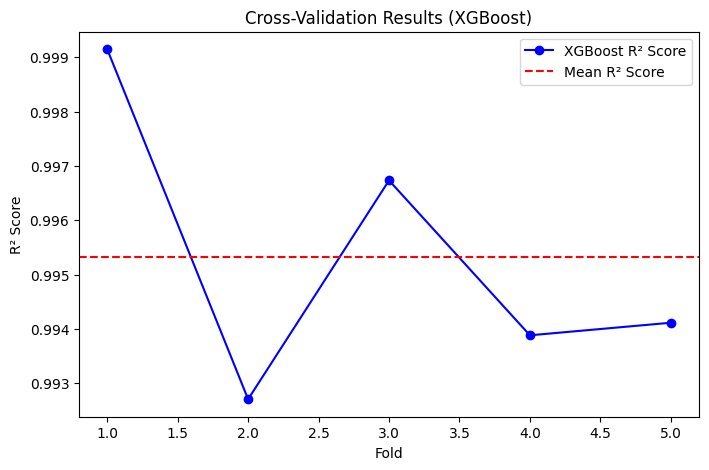

In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring="r2")

# Plot cross-validation results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b', label="XGBoost R² Score")
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label="Mean R² Score")
plt.title("Cross-Validation Results (XGBoost)")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.legend()
plt.show()


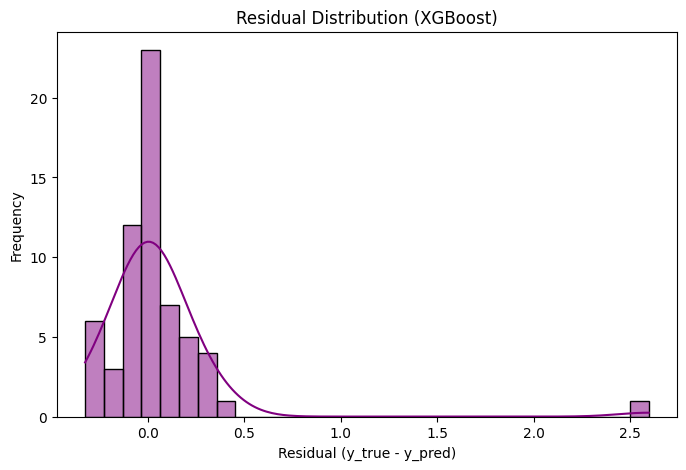

In [25]:
# Calculate residuals
y_pred = best_xgb.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Residual (y_true - y_pred)")
plt.ylabel("Frequency")
plt.show()


In [27]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
import os

# Create 'models' folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Now save models
for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f"models/{name}.pkl")  # Save each model


NameError: name 'joblib' is not defined

In [29]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("yacht_hydrodynamics.csv")  # Change to your actual dataset
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Normalize data for models like SVR
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define all models
models = {
    "linear_regression": LinearRegression(),
    "decision_tree": DecisionTreeRegressor(),
    "random_forest": RandomForestRegressor(),
    "bagging": BaggingRegressor(),
    "gradient_boosting": GradientBoostingRegressor(),
    "adaboost": AdaBoostRegressor(),
    "knn": KNeighborsRegressor(),
    "svr": SVR()
}

# Train and save each model
for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f"models/{name}.pkl")  # Save each model

# Save the scaler (important for SVR, KNN)
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [30]:
pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
pip install gradio


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
import gradio as gr
import joblib
import numpy as np
import os

# Get list of available models
model_dir = "models"
model_files = [f for f in os.listdir(model_dir) if f.endswith(".pkl")]

# Function to load selected model and predict
def predict_resistance(model_name, LC, PC, LD, BDr, LB, Fr):
    model_path = os.path.join(model_dir, model_name)
    model = joblib.load(model_path)  # Load selected model

    input_data = np.array([[LC, PC, LD, BDr, LB, Fr]])
    prediction = model.predict(input_data)
    return f"### 🔥 Predicted Residuary Resistance: **{prediction[0]:.2f}**"

# Custom CSS Styling
custom_css = """
h1 { color: #40E0D0; text-align: center; }
body { background-color: #00008B; color: white; }
.gradio-container { background-color: #00008B; padding: 20px; border-radius: 10px; }
button { background-color: #40E0D0 !important; color: white !important; font-size: 16px; }
"""

# UI Components
with gr.Blocks(css=custom_css) as interface:
    gr.Markdown("# 🚤 Residuary Resistance Prediction")
    gr.Markdown("Select a model and enter values to get the predicted resistance.")

    with gr.Row():
        model_dropdown = gr.Dropdown(choices=model_files, label="📂 Select Model")
    
    with gr.Row():
        LC = gr.Number(label="🔹 LC: Longitudinal Position of Centre of Buoyancy")
        PC = gr.Number(label="🔹 PC: Prismatic Coefficient")
    
    with gr.Row():
        LD = gr.Number(label="🔹 L/D: Length Displacement Ratio")
        BDr = gr.Number(label="🔹 B/Dr: Beam Draught Ratio")
    
    with gr.Row():
        LB = gr.Number(label="🔹 L/B: Length Beam Ratio")
        Fr = gr.Number(label="🔹 Fr: Froude Number")

    predict_button = gr.Button("🚀 Predict Resistance")
    output_text = gr.Markdown("")

    predict_button.click(
        predict_resistance, 
        inputs=[model_dropdown, LC, PC, LD, BDr, LB, Fr], 
        outputs=output_text
    )

interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
